In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical

In [7]:
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
y_encoder = to_categorical(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_encoder, test_size=0.33, random_state=42)

In [13]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax') # Changed to 2 neurons and softmax activation
])

In [15]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]) # Changed loss function

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 3.3925e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9787 - val_loss: 0.0953 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.7295e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9787 - val_loss: 0.0950 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 3.1981e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9787 - val_loss: 0.0967 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 5.2358e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9787 - val_loss: 0.0956 - val_precision: 0.9787 - val_recall: 0.9787
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.5321e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.978

In [19]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy: {results[1]:.3f}, Precision: {results[2]:.3f}, Recall: {results[3]:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9695 - loss: 0.2045 - precision: 0.9695 - recall: 0.9695
Accuracy: 0.973, Precision: 0.973, Recall: 0.973


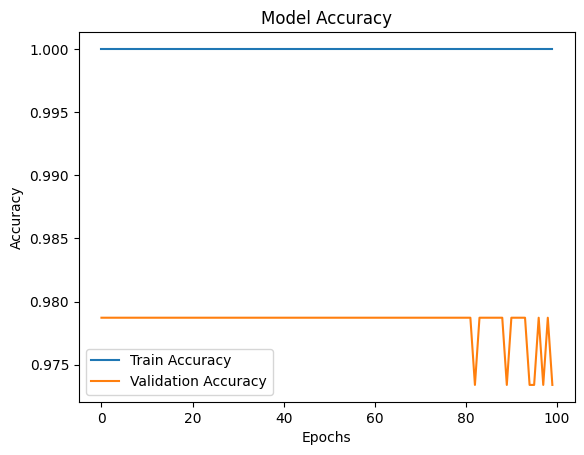

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()